## Hallelujah

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold,train_test_split,KFold
from sklearn.metrics import accuracy_score,log_loss
import time
# !pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA

In [5]:
#loading in data sets
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('sample_submission.csv')
desp = pd.read_csv('VariableDefinitions.csv')

In [6]:
len(train)

400000

In [7]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [8]:
desp

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [10]:
print(train.shape)
print(test.shape)

(400000, 19)
(100000, 18)


In [11]:
train.isna().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [12]:
to_drop = [columns for columns in train.columns[train.isnull().mean()>=0.7]]
to_drop.extend(['user_id','MRG'])
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
print(f'The following columns were dropped {to_drop}')

The following columns were dropped ['ZONE1', 'ZONE2', 'user_id', 'MRG']


In [13]:
tenure_map  = {'K > 24 month':24,'J 21-24 month':21, 'I 18-21 month':18, 'H 15-18 month':15, 'G 12-15 month':12, 'F 9-12 month':9,
              'E 6-9 month':6,'D 3-6 month':3}
train['TENURE'] = train['TENURE'].map(tenure_map)
test['TENURE'] = test['TENURE'].map(tenure_map)

In [14]:
top_pack = {'All-net 500F=2000F;5d':500, 'Data: 100 F=40MB,24H':100, 'On net 200F=Unlimited _call24H':200,'Data:490F=1GB,7d':490,
            'Data:1000F=5GB,7d':1000, 'VAS(IVR_Radio_Daily)':100, 'Data:200F=Unlimited,24H':200, 'Jokko_Daily':50,
            'Mixt 250F=Unlimited_call24H':250, 'Data: 200 F=100MB,24H':200,'MIXT:500F= 2500F on net _2500F off net;2d':500,
            'Data:1000F=2GB,30d':1000,'IVR Echat_Daily_50F':50,'On-net 1000F=10MilF;10d':1000,'All-net 600F= 3000F ;5d':600,
            'Twter_U2opia_Daily':100,'MIXT: 200mnoff net _unl on net _5Go;30d':2000, 'On-net 500F_FNF;3d':500, 'Twter_U2opia_Weekly':10,
            'All-net 500F =2000F_AllNet_Unlimited':500,'Yewouleen_PKG':10,'On-net 500=4000,10d':500, 'On-net 200F=60mn;1d':200,
            'Data:3000F=10GB,30d':3000, 'Incoming_Bonus_woma':1000,'All-net 1000=5000;5d':1000, 'Data:500F=2GB,24H':500,
            'Data:300F=100MB,2d':300,'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t':390, 'Data:50F=30MB_24H':50,
            'All-net 1000F=(3000F On+3000F Off);5d':1000,'All-net 500F=1250F_AllNet_1250_Onnet;48h':500,
            'Data:150F=SPPackage1,24H':150, 'CVM_on-net bundle 500=5000':500,'Data: 200F=1GB,24H':200,
            '200=Unlimited1Day':200, 'MROMO_TIMWES_OneDAY':50,'200F=10mnOnNetValid1H':200, 'On net 200F= 3000F_10Mo ;24H':200,
            'All-net 300=600;2d':300, 'On-net 300F=1800F;3d':300,'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t':590,
            'YMGX 100=1 hour FNF, 24H/1 month':100, '500=Unlimited3Day':500,'Data:DailyCycle_Pilot_1.5GB':100,
            'Data:1500F=3GB,30D':1500,'New_YAKALMA_4_ALL':100,'Twter_U2opia_Monthly':50, 'Jokko_promo':100,
            'Pilot_Youth4_490':490, 'SUPERMAGIK_5000':5000,'On-net 2000f_One_Month_100H; 30d':2000,'Jokko_Monthly':500,
            'Jokko_Weekly':250, 'Facebook_MIX_2D':250, 'Data: 490F=Night,00H-08H':490,'Internat: 1000F_Zone_1;24H\t\t':1000,
            'FNF2 ( JAPPANTE)':500,'All-net 500F=4000F ; 5d':500, 'WIFI_Family_2MBPS':2000,'Data:700F=SPPackage1,7d':700,
            'Data:700F=1.5GB,7d':700,'Data:30Go_V 30_Days':400, 'DataPack_Incoming':500,
            'MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t':500,'EVC_500=2000F':500,
            'MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d':1000,'MROMO_TIMWES_RENEW':50,
            'All-net 5000= 20000off+20000on;30d':5000,'Pilot_Youth1_290':290, 'Data:1500F=SPPackage1,30d':1500,
            'MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t':10000, 'EVC_Jokko_Weekly':200,
            'MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t':5000,'WIFI_ Family _4MBPS':5000, 'Internat: 1000F_Zone_3;24h\t\t':1000,
            'Mixt : 500F=2500Fonnet_2500Foffnet ;5d':500, 'FIFA_TS_daily':50,'CVM_100F_unlimited':100,
            'WIFI_ Family _10MBPS':1000, '301765007':50,'SUPERMAGIK_1000':1000,
            'TelmunCRBT_daily':50, 'pilot_offer6':800, '305155009':500,'VAS(IVR_Radio_Monthly)':1000,'Staff_CPE_Rent':500,
            'IVR Echat_Weekly_200F':200,'1000=Unlimited7Day':1000, 'FNF_Youth_ESN':500,'EVC_100Mo':70,
            'Data:New-GPRS_PKG_1500F':1500,'Data_EVC_2Go24H':200,'CVM_100f=200 MB':100,'Internat: 2000F_Zone_2;24H\t\t':2000,
            'MIXT: 4900F= 10H on net_1,5Go ;30d':4900, 'VAS(IVR_Radio_Weekly)':500,'pilot_offer5':100,
            'CVM_200f=400MB':200, 'APANews_weekly':60, 'CVM_500f=2GB':500,'CVM_On-net 1300f=12500':1300,
            'pack_chinguitel_24h':100,'NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE':500,'NEW_CLIR_PERMANENT_LIBERTE_MOBILE':1000,
            'GPRS_3000Equal10GPORTAL':3000,'APANews_monthly':1500,'200=unlimited pilot auto':200,'IVR Echat_Monthly_500F':500,
            'CVM_On-net 400f=2200F':400,'EVC_MEGA10000F':10000}

In [15]:
train['TOP_PACK'] = train['TOP_PACK'].map(top_pack)
test['TOP_PACK'] = test['TOP_PACK'].map(top_pack)

In [16]:
cat_feat = [col for col in train if train[col].dtypes == 'O' not in['REGION']]
num_feat = [col for col in train if train[col].dtypes == 'float64']
num_feat.append('REGULARITY')

In [17]:
#filling the remaining missing data
for col in num_feat:
    train[col].fillna(train[col].mean(),inplace= True)
    test[col].fillna(test[col].mean(),inplace= True)

In [18]:
train['TOP_PACK'].unique()

array([  500.        ,   100.        ,   200.        ,   439.84450146,
         490.        ,  1000.        ,    50.        ,   250.        ,
         600.        ,  2000.        ,    10.        ,  3000.        ,
         300.        ,   390.        ,   150.        ,   590.        ,
        1500.        ,  5000.        ,   700.        ,   400.        ,
         290.        , 10000.        ,   800.        ,    70.        ,
        4900.        ,    60.        ,  1300.        ])

In [19]:
#filling the remaining missing data
for col in cat_feat:
    train[col].fillna('unknown',inplace= True)
    test[col].fillna('unknown',inplace= True)

In [20]:
train=pd.concat([train,pd.get_dummies(train['REGION'])],axis=1)
test=pd.concat([test,pd.get_dummies(test['REGION'])],axis=1)
train.drop('REGION', axis=1, inplace=True)
test.drop('REGION', axis=1, inplace=True)

In [21]:
train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,KEDOUGOU,KOLDA,LOUGA,MATAM,SAINT-LOUIS,SEDHIOU,TAMBACOUNDA,THIES,ZIGUINCHOR,unknown
0,24,17000.000000,32.000000,18000.0,6000.0,34.0,3369.763441,97.0,355.0,6.000000,...,0,0,0,0,1,0,0,0,0,0
1,24,4300.000000,29.000000,4427.0,1476.0,37.0,1764.000000,8.0,3.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,24,1500.000000,3.000000,1500.0,500.0,3.0,3369.763441,30.0,30.0,23.134608,...,0,0,0,0,0,0,1,0,0,0
3,24,1500.000000,3.000000,2497.0,832.0,4.0,0.000000,159.0,45.0,19.000000,...,0,0,0,0,0,0,0,0,0,0
4,24,5522.971346,11.503733,498.0,166.0,3.0,1.000000,1.0,3.0,23.134608,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Frequency encoding
def freq_encode(data, cols):
    for i in cols:
        encoding = data.groupby(i).size()
        encoding = encoding/len(data)
        data[i + '_enc'] = data[i].map(encoding)
    return data

#Function for automating feature interactions between important features to generate more information for the model.
def feature_interact(df, s_col):
    for i in s_col:
        for j in s_col:
            if j != i : df[i + '/' + j] = df[i] / df[j] 

#     for i in s_col:
#         for j in s_col:
#             if j != i : df[i + '+' + j] = df[i] + df[j]

#     for i in s_col:
#         for j in s_col:
#             if j != i : df[i + '-' + j] = df[i] - df[j]

    for i in s_col:
        for j in s_col:
            if j != i : df[i + '*' + j] = df[i] * df[j]
    return df


In [23]:
freq_encode(train,train.drop('CHURN', axis=1))
freq_encode(test,test)

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,KEDOUGOU_enc,KOLDA_enc,LOUGA_enc,MATAM_enc,SAINT-LOUIS_enc,SEDHIOU_enc,TAMBACOUNDA_enc,THIES_enc,ZIGUINCHOR_enc,unknown_enc
0,24,5545.61363,11.545051,5518.341663,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,...,0.99958,0.98225,0.95384,0.98589,0.94343,0.99874,0.97404,0.91699,0.98994,0.39293
1,24,5545.61363,11.545051,10.000000,3.000000,1.000000,3357.428033,279.370703,94.900799,23.459291,...,0.99958,0.98225,0.95384,0.98589,0.94343,0.99874,0.97404,0.91699,0.98994,0.39293
2,24,1900.00000,15.000000,2299.000000,766.000000,21.000000,414.000000,279.370703,7.000000,2.000000,...,0.99958,0.98225,0.95384,0.98589,0.94343,0.99874,0.97404,0.91699,0.98994,0.39293
3,24,3000.00000,9.000000,2603.000000,868.000000,14.000000,332.000000,0.000000,23.000000,4.000000,...,0.99958,0.98225,0.95384,0.98589,0.94343,0.99874,0.97404,0.91699,0.98994,0.60707
4,24,32000.00000,47.000000,33000.000000,11000.000000,47.000000,3357.428033,128.000000,555.000000,280.000000,...,0.99958,0.98225,0.95384,0.98589,0.94343,0.99874,0.97404,0.91699,0.98994,0.60707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,24,200.00000,1.000000,20.000000,7.000000,1.000000,3357.428033,279.370703,0.000000,23.459291,...,0.99958,0.98225,0.04616,0.98589,0.94343,0.99874,0.97404,0.91699,0.98994,0.60707
99996,24,1000.00000,1.000000,998.000000,333.000000,4.000000,1.000000,6.000000,3.000000,23.459291,...,0.99958,0.98225,0.95384,0.98589,0.94343,0.99874,0.02596,0.91699,0.98994,0.60707
99997,18,1800.00000,7.000000,1799.000000,600.000000,9.000000,81.000000,2.000000,0.000000,23.459291,...,0.99958,0.98225,0.95384,0.98589,0.94343,0.99874,0.97404,0.91699,0.98994,0.39293
99998,24,2500.00000,4.000000,2515.000000,838.000000,4.000000,3357.428033,43.000000,106.000000,4.000000,...,0.99958,0.98225,0.95384,0.98589,0.94343,0.99874,0.97404,0.08301,0.98994,0.60707


In [24]:
train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,KEDOUGOU_enc,KOLDA_enc,LOUGA_enc,MATAM_enc,SAINT-LOUIS_enc,SEDHIOU_enc,TAMBACOUNDA_enc,THIES_enc,ZIGUINCHOR_enc,unknown_enc
0,24,17000.000000,32.000000,18000.0,6000.0,34.0,3369.763441,97.0,355.0,6.000000,...,0.999548,0.98199,0.953717,0.986862,0.055313,0.998528,0.974317,0.916565,0.98997,0.6062
1,24,4300.000000,29.000000,4427.0,1476.0,37.0,1764.000000,8.0,3.0,0.000000,...,0.999548,0.98199,0.953717,0.986862,0.944688,0.998528,0.974317,0.916565,0.98997,0.3938
2,24,1500.000000,3.000000,1500.0,500.0,3.0,3369.763441,30.0,30.0,23.134608,...,0.999548,0.98199,0.953717,0.986862,0.944688,0.998528,0.025683,0.916565,0.98997,0.6062
3,24,1500.000000,3.000000,2497.0,832.0,4.0,0.000000,159.0,45.0,19.000000,...,0.999548,0.98199,0.953717,0.986862,0.944688,0.998528,0.974317,0.916565,0.98997,0.6062
4,24,5522.971346,11.503733,498.0,166.0,3.0,1.000000,1.0,3.0,23.134608,...,0.999548,0.98199,0.953717,0.986862,0.944688,0.998528,0.974317,0.916565,0.98997,0.6062


In [61]:
feature_interact(train,s_col=['REGULARITY','REVENUE','MONTANT'])
feature_interact(test,s_col=['REGULARITY','REVENUE','MONTANT'])

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGULARITY/MONTANT,REVENUE/REGULARITY,REVENUE/MONTANT,MONTANT/REGULARITY,MONTANT/REVENUE,REGULARITY*MONTANT,REVENUE*REGULARITY,REVENUE*MONTANT,MONTANT*REGULARITY,MONTANT*REVENUE
0,24,5545.61363,11.545051,5518.341663,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,...,0.000180,5518.341663,0.995082,5545.613630,1.004942,5.545614e+03,5.518342e+03,3.060259e+07,5.545614e+03,3.060259e+07
1,24,5545.61363,11.545051,10.000000,3.000000,1.000000,3357.428033,279.370703,94.900799,23.459291,...,0.000361,5.000000,0.001803,2772.806815,554.561363,1.109123e+04,2.000000e+01,5.545614e+04,1.109123e+04,5.545614e+04
2,24,1900.00000,15.000000,2299.000000,766.000000,21.000000,414.000000,279.370703,7.000000,2.000000,...,0.014211,85.148148,1.210000,70.370370,0.826446,5.130000e+04,6.207300e+04,4.368100e+06,5.130000e+04,4.368100e+06
3,24,3000.00000,9.000000,2603.000000,868.000000,14.000000,332.000000,0.000000,23.000000,4.000000,...,0.015333,56.586957,0.867667,65.217391,1.152516,1.380000e+05,1.197380e+05,7.809000e+06,1.380000e+05,7.809000e+06
4,24,32000.00000,47.000000,33000.000000,11000.000000,47.000000,3357.428033,128.000000,555.000000,280.000000,...,0.001906,540.983607,1.031250,524.590164,0.969697,1.952000e+06,2.013000e+06,1.056000e+09,1.952000e+06,1.056000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,24,200.00000,1.000000,20.000000,7.000000,1.000000,3357.428033,279.370703,0.000000,23.459291,...,0.230000,0.434783,0.100000,4.347826,10.000000,9.200000e+03,9.200000e+02,4.000000e+03,9.200000e+03,4.000000e+03
99996,24,1000.00000,1.000000,998.000000,333.000000,4.000000,1.000000,6.000000,3.000000,23.459291,...,0.026000,38.384615,0.998000,38.461538,1.002004,2.600000e+04,2.594800e+04,9.980000e+05,2.600000e+04,9.980000e+05
99997,18,1800.00000,7.000000,1799.000000,600.000000,9.000000,81.000000,2.000000,0.000000,23.459291,...,0.033333,29.983333,0.999444,30.000000,1.000556,1.080000e+05,1.079400e+05,3.238200e+06,1.080000e+05,3.238200e+06
99998,24,2500.00000,4.000000,2515.000000,838.000000,4.000000,3357.428033,43.000000,106.000000,4.000000,...,0.006400,157.187500,1.006000,156.250000,0.994036,4.000000e+04,4.024000e+04,6.287500e+06,4.000000e+04,6.287500e+06


In [26]:
v = ['REVENUE/REGULARITY','REVENUE*REGULARITY']
train.drop(v,axis = 1, inplace = True)
test.drop(v,axis = 1, inplace = True)

In [62]:
train.shape

(400000, 69)

In [63]:
y= train['CHURN']
X = train.drop('CHURN',axis = 1)

## MODEL

In [53]:
submission['CHURN'] = test_scores

In [54]:
submission.to_csv('cat_late',index=False)

In [64]:
kf = StratifiedKFold(n_splits=5,random_state=43,shuffle=True)
scores = []
test_scores = np.zeros(len(test))
for fold,(tr_in,te_in) in enumerate(kf.split(X,y)):
    print("================================Fold{fold}====================================".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]

    cat = CatBoostClassifier(iterations=100, learning_rate=0.1, l2_leaf_reg=32, depth=10, rsm=0.98, loss_function= 'Logloss',border_count=100,
                             eval_metric='Logloss',use_best_model=True)
    cat.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=500,use_best_model=True)
    #scores.append(np.sqrt(mean_squared_error(y_test,cat.predict(X_test))))
    test_scores += cat.predict_proba(test)[:,1]
    #scores.append(np.sqrt(mean_squared_error(y_test,cat.predict(X_test))))
    # test_scores = cat.predict_proba(test)
    # test_scores= test_scores[:,1]

================================Fold0====================================
0:	learn: 0.5474527	test: 0.5474527	test1: 0.5471121	best: 0.5471121 (0)	total: 1.13s	remaining: 1m 51s
1:	learn: 0.4504637	test: 0.4504637	test1: 0.4501721	best: 0.4501721 (1)	total: 2.21s	remaining: 1m 48s
2:	learn: 0.3897686	test: 0.3897686	test1: 0.3895741	best: 0.3895741 (2)	total: 3.29s	remaining: 1m 46s
3:	learn: 0.3490338	test: 0.3490338	test1: 0.3489361	best: 0.3489361 (3)	total: 4.47s	remaining: 1m 47s
4:	learn: 0.3222420	test: 0.3222420	test1: 0.3223028	best: 0.3223028 (4)	total: 5.58s	remaining: 1m 45s
5:	learn: 0.3045117	test: 0.3045117	test1: 0.3047403	best: 0.3047403 (5)	total: 6.7s	remaining: 1m 45s
6:	learn: 0.2917036	test: 0.2917036	test1: 0.2920929	best: 0.2920929 (6)	total: 7.81s	remaining: 1m 43s
7:	learn: 0.2829023	test: 0.2829023	test1: 0.2834247	best: 0.2834247 (7)	total: 9.65s	remaining: 1m 51s
8:	learn: 0.2760818	test: 0.2760818	test1: 0.2767094	best: 0.2767094 (8)	total: 11.6s	remaining

77:	learn: 0.2477647	test: 0.2477647	test1: 0.2525413	best: 0.2525413 (77)	total: 1m 57s	remaining: 33s
78:	learn: 0.2477197	test: 0.2477197	test1: 0.2525456	best: 0.2525413 (77)	total: 1m 58s	remaining: 31.5s
79:	learn: 0.2476422	test: 0.2476422	test1: 0.2525447	best: 0.2525413 (77)	total: 2m	remaining: 30s
80:	learn: 0.2476044	test: 0.2476044	test1: 0.2525384	best: 0.2525384 (80)	total: 2m 1s	remaining: 28.4s
81:	learn: 0.2475361	test: 0.2475361	test1: 0.2525461	best: 0.2525384 (80)	total: 2m 2s	remaining: 26.9s
82:	learn: 0.2475334	test: 0.2475334	test1: 0.2525455	best: 0.2525384 (80)	total: 2m 3s	remaining: 25.3s
83:	learn: 0.2474869	test: 0.2474869	test1: 0.2525410	best: 0.2525384 (80)	total: 2m 5s	remaining: 23.9s
84:	learn: 0.2474424	test: 0.2474424	test1: 0.2525374	best: 0.2525374 (84)	total: 2m 6s	remaining: 22.4s
85:	learn: 0.2473873	test: 0.2473873	test1: 0.2525464	best: 0.2525374 (84)	total: 2m 8s	remaining: 20.9s
86:	learn: 0.2473542	test: 0.2473542	test1: 0.2525360	best: 

54:	learn: 0.2484464	test: 0.2484464	test1: 0.2549512	best: 0.2549512 (54)	total: 1m 27s	remaining: 1m 11s
55:	learn: 0.2483789	test: 0.2483789	test1: 0.2549305	best: 0.2549305 (55)	total: 1m 29s	remaining: 1m 10s
56:	learn: 0.2482867	test: 0.2482867	test1: 0.2549209	best: 0.2549209 (56)	total: 1m 31s	remaining: 1m 8s
57:	learn: 0.2482288	test: 0.2482288	test1: 0.2549189	best: 0.2549189 (57)	total: 1m 32s	remaining: 1m 7s
58:	learn: 0.2481614	test: 0.2481614	test1: 0.2549263	best: 0.2549189 (57)	total: 1m 33s	remaining: 1m 5s
59:	learn: 0.2481354	test: 0.2481354	test1: 0.2549204	best: 0.2549189 (57)	total: 1m 34s	remaining: 1m 3s
60:	learn: 0.2480834	test: 0.2480834	test1: 0.2549156	best: 0.2549156 (60)	total: 1m 36s	remaining: 1m 1s
61:	learn: 0.2479917	test: 0.2479917	test1: 0.2549097	best: 0.2549097 (61)	total: 1m 38s	remaining: 1m
62:	learn: 0.2479250	test: 0.2479250	test1: 0.2549018	best: 0.2549018 (62)	total: 1m 40s	remaining: 59.1s
63:	learn: 0.2478862	test: 0.2478862	test1: 0.2

31:	learn: 0.2517078	test: 0.2517078	test1: 0.2515110	best: 0.2515110 (31)	total: 51s	remaining: 1m 48s
32:	learn: 0.2515807	test: 0.2515807	test1: 0.2514273	best: 0.2514273 (32)	total: 52.1s	remaining: 1m 45s
33:	learn: 0.2514039	test: 0.2514039	test1: 0.2513748	best: 0.2513748 (33)	total: 53.7s	remaining: 1m 44s
34:	learn: 0.2512858	test: 0.2512858	test1: 0.2513250	best: 0.2513250 (34)	total: 55.6s	remaining: 1m 43s
35:	learn: 0.2511965	test: 0.2511965	test1: 0.2512783	best: 0.2512783 (35)	total: 57.5s	remaining: 1m 42s
36:	learn: 0.2510978	test: 0.2510978	test1: 0.2512454	best: 0.2512454 (36)	total: 59.1s	remaining: 1m 40s
37:	learn: 0.2510045	test: 0.2510045	test1: 0.2512000	best: 0.2512000 (37)	total: 1m	remaining: 1m 38s
38:	learn: 0.2509019	test: 0.2509019	test1: 0.2511677	best: 0.2511677 (38)	total: 1m 1s	remaining: 1m 36s
39:	learn: 0.2507730	test: 0.2507730	test1: 0.2511179	best: 0.2511179 (39)	total: 1m 3s	remaining: 1m 34s
40:	learn: 0.2507013	test: 0.2507013	test1: 0.25110

8:	learn: 0.2756201	test: 0.2756201	test1: 0.2760953	best: 0.2760953 (8)	total: 15.3s	remaining: 2m 34s
9:	learn: 0.2704187	test: 0.2704187	test1: 0.2710136	best: 0.2710136 (9)	total: 17.2s	remaining: 2m 34s
10:	learn: 0.2665914	test: 0.2665914	test1: 0.2673221	best: 0.2673221 (10)	total: 19s	remaining: 2m 33s
11:	learn: 0.2637716	test: 0.2637716	test1: 0.2645611	best: 0.2645611 (11)	total: 20.5s	remaining: 2m 30s
12:	learn: 0.2615438	test: 0.2615438	test1: 0.2624001	best: 0.2624001 (12)	total: 21.6s	remaining: 2m 24s
13:	learn: 0.2597460	test: 0.2597460	test1: 0.2606839	best: 0.2606839 (13)	total: 22.7s	remaining: 2m 19s
14:	learn: 0.2583107	test: 0.2583107	test1: 0.2593003	best: 0.2593003 (14)	total: 23.9s	remaining: 2m 15s
15:	learn: 0.2572184	test: 0.2572184	test1: 0.2583203	best: 0.2583203 (15)	total: 25.6s	remaining: 2m 14s
16:	learn: 0.2561825	test: 0.2561825	test1: 0.2573932	best: 0.2573932 (16)	total: 27.5s	remaining: 2m 14s
17:	learn: 0.2553580	test: 0.2553580	test1: 0.256631

86:	learn: 0.2472356	test: 0.2472356	test1: 0.2526900	best: 0.2526666 (69)	total: 2m 14s	remaining: 20.1s
87:	learn: 0.2471556	test: 0.2471556	test1: 0.2526857	best: 0.2526666 (69)	total: 2m 15s	remaining: 18.5s
88:	learn: 0.2470780	test: 0.2470780	test1: 0.2526648	best: 0.2526648 (88)	total: 2m 16s	remaining: 16.9s
89:	learn: 0.2470121	test: 0.2470121	test1: 0.2526616	best: 0.2526616 (89)	total: 2m 18s	remaining: 15.4s
90:	learn: 0.2469822	test: 0.2469822	test1: 0.2526530	best: 0.2526530 (90)	total: 2m 20s	remaining: 13.9s
91:	learn: 0.2469289	test: 0.2469289	test1: 0.2526492	best: 0.2526492 (91)	total: 2m 22s	remaining: 12.3s
92:	learn: 0.2468963	test: 0.2468963	test1: 0.2526490	best: 0.2526490 (92)	total: 2m 23s	remaining: 10.8s
93:	learn: 0.2468445	test: 0.2468445	test1: 0.2526492	best: 0.2526490 (92)	total: 2m 24s	remaining: 9.24s
94:	learn: 0.2468122	test: 0.2468122	test1: 0.2526426	best: 0.2526426 (94)	total: 2m 25s	remaining: 7.68s
95:	learn: 0.2467797	test: 0.2467797	test1: 0.

63:	learn: 0.2489980	test: 0.2489980	test1: 0.2510691	best: 0.2510691 (63)	total: 1m 37s	remaining: 54.7s
64:	learn: 0.2489687	test: 0.2489687	test1: 0.2510685	best: 0.2510685 (64)	total: 1m 38s	remaining: 53s
65:	learn: 0.2489324	test: 0.2489324	test1: 0.2510519	best: 0.2510519 (65)	total: 1m 40s	remaining: 51.6s
66:	learn: 0.2488288	test: 0.2488288	test1: 0.2510393	best: 0.2510393 (66)	total: 1m 42s	remaining: 50.3s
67:	learn: 0.2487779	test: 0.2487779	test1: 0.2510261	best: 0.2510261 (67)	total: 1m 43s	remaining: 48.9s
68:	learn: 0.2487204	test: 0.2487204	test1: 0.2510008	best: 0.2510008 (68)	total: 1m 44s	remaining: 47.1s
69:	learn: 0.2486599	test: 0.2486599	test1: 0.2509901	best: 0.2509901 (69)	total: 1m 46s	remaining: 45.7s
70:	learn: 0.2486270	test: 0.2486270	test1: 0.2509796	best: 0.2509796 (70)	total: 1m 48s	remaining: 44.2s
71:	learn: 0.2485534	test: 0.2485534	test1: 0.2509805	best: 0.2509796 (70)	total: 1m 50s	remaining: 42.8s
72:	learn: 0.2484854	test: 0.2484854	test1: 0.25

In [65]:
cat.best_score_

{'learn': {'Logloss': 0.24720526250442645},
 'validation_0': {'Logloss': 0.24720526250442645},
 'validation_1': {'Logloss': 0.25084682703859096}}

In [51]:
test_scores = test_scores/5

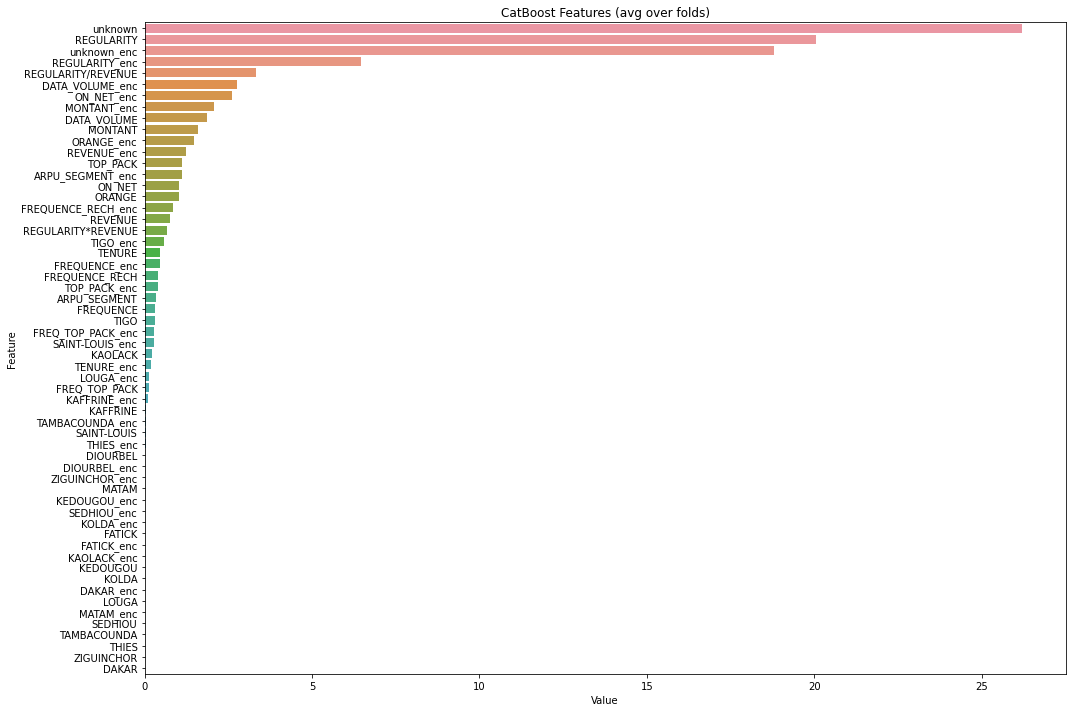

In [60]:
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('CatBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

In [41]:
submission['CHURN'] = test_scores2
submission.to_csv('cat_late1',index=False)